In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [145]:
data = pd.read_csv('solar power.csv')

In [146]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [159]:
data.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [160]:
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [163]:
data['radiation_humidity'] = data['shortwave_radiation_backwards_sfc'] * data['relative_humidity_2_m_above_gnd']
data['radiation_zenith'] = data['shortwave_radiation_backwards_sfc'] * data['zenith']
data['angle_ratio'] = data['angle_of_incidence'] / (data['zenith'] + 1)
data['radiation_efficiency'] = data['shortwave_radiation_backwards_sfc'] / (data['total_cloud_cover_sfc'] + 1)
data['temp_radiation_ratio'] = data['temperature_2_m_above_gnd'] / (data['shortwave_radiation_backwards_sfc'] + 1)

In [164]:
correlation = data.corr(numeric_only=True)
top_corr = correlation['generated_power_kw'].drop('generated_power_kw').abs().sort_values(ascending=False).head(10)
print("Top Features by Correlation with Target:\n", top_corr)

Top Features by Correlation with Target:
 zenith                               0.649991
angle_of_incidence                   0.646537
shortwave_radiation_backwards_sfc    0.556148
radiation_humidity                   0.492259
radiation_efficiency                 0.480488
relative_humidity_2_m_above_gnd      0.336783
total_cloud_cover_sfc                0.334338
temp_radiation_ratio                 0.327086
radiation_zenith                     0.295482
low_cloud_cover_low_cld_lay          0.288066
Name: generated_power_kw, dtype: float64


In [165]:
selected_features = [
    'zenith',
    'angle_of_incidence',
    'shortwave_radiation_backwards_sfc',
    'radiation_humidity',
    'radiation_efficiency',
    'relative_humidity_2_m_above_gnd',
    'total_cloud_cover_sfc',
    'temp_radiation_ratio',
    'radiation_zenith',
    'low_cloud_cover_low_cld_lay'
]
target_column = 'generated_power_kw'

In [166]:
X = data[selected_features]
y = data[target_column]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [170]:
y_pred = model.predict(X_test)

In [171]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [172]:
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 578.245199059909
R-squared Score: 0.6339564607198627
Mean Absolute Error: 465.2927016098992


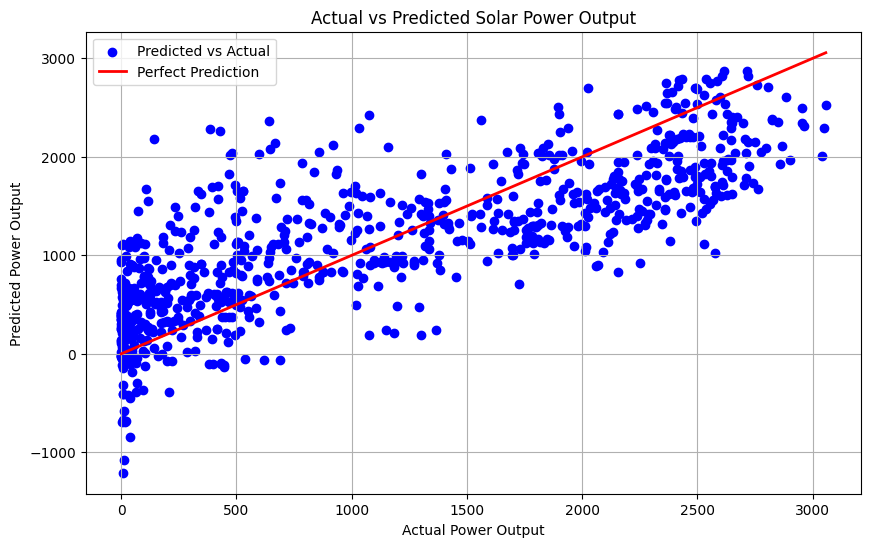

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

plt.title("Actual vs Predicted Solar Power Output")
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.legend()
plt.grid(True)

plt.show()


In [175]:
def predict_solar_power(zenith, angle, solar_radiation, humidity, total_cloud, temperature, low_cloud):
    radiation_humidity = solar_radiation * humidity
    radiation_zenith = solar_radiation * zenith
    radiation_efficiency = solar_radiation / (total_cloud + 1)
    temp_radiation_ratio = temperature / (solar_radiation + 1)

    input_data = np.array([[zenith, angle, solar_radiation, radiation_humidity,
                            radiation_efficiency, humidity, total_cloud,
                            temp_radiation_ratio, radiation_zenith, low_cloud]])

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return max(prediction[0], 0)


In [177]:
try:
    zenith = float(input("Enter zenith (e.g., 60): "))
    angle = float(input("Enter angle of incidence (e.g., 45): "))
    solar_radiation = float(input("Enter shortwave radiation (e.g., 300): "))
    humidity = float(input("Enter relative humidity (e.g., 31): "))
    total_cloud = float(input("Enter total cloud cover (e.g., 40): "))
    temperature = float(input("Enter temperature (e.g., 15): "))
    low_cloud = float(input("Enter low cloud cover (e.g., 10): "))

    user_prediction = predict_solar_power(
        zenith, angle, solar_radiation, humidity,
        total_cloud, temperature, low_cloud
    )
    print(f"\nPredicted Solar Power Output: {user_prediction:.2f} units")

except Exception as e:
    print(f"Error: {e}")


Enter zenith (e.g., 60):  23
Enter angle of incidence (e.g., 45):  43
Enter shortwave radiation (e.g., 300):  355
Enter relative humidity (e.g., 31):  43
Enter total cloud cover (e.g., 40):  23
Enter temperature (e.g., 15):  12
Enter low cloud cover (e.g., 10):  7



Predicted Solar Power Output: 1799.47 units


C:\Users\Shreya Bhelekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
